In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
data = np.array(pd.read_csv("../../data/fetal_health.csv"), dtype=np.float32)
X = data[:, :-1]
y = data[:, -1] - 1
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X)

/Users/barissen/opt/miniconda3/envs/ml3d/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/barissen/opt/miniconda3/envs/ml3d/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2126 samples in 0.000s...
[t-SNE] Computed neighbors for 2126 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2126
[t-SNE] Computed conditional probabilities for sample 2000 / 2126
[t-SNE] Computed conditional probabilities for sample 2126 / 2126
[t-SNE] Mean sigma: 12.515108
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.333412
[t-SNE] KL divergence after 1000 iterations: 0.770034


In [3]:
df_tsne = pd.DataFrame()
df_tsne["y"] = y
df_tsne["dimension1"] = z[:, 0]
df_tsne["dimension2"] = z[:, 1]

In [4]:
pca = PCA(n_components=2)
pca.fit(X)
z = pca.transform(X)

In [5]:
df_PCA = pd.DataFrame()
df_PCA["y"] = y
df_PCA["dimension1"] = z[:, 0]
df_PCA["dimension2"] = z[:, 1]

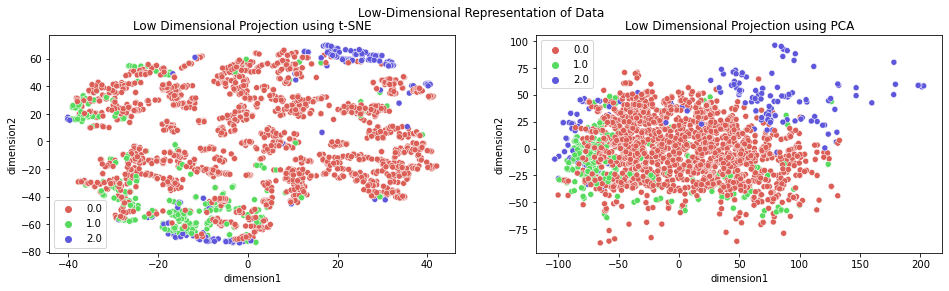

In [6]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Low-Dimensional Representation of Data')
fig.set_figwidth(16)
sn.scatterplot(x="dimension1", y="dimension2", hue=df_tsne.y.tolist(),
                palette=sn.color_palette("hls", 3),
                data=df_tsne, ax=axes[0]).set(title="Low Dimensional Projection using t-SNE")
sn.scatterplot(x="dimension1", y="dimension2", hue=df_PCA.y.tolist(),
               palette=sn.color_palette("hls", 3),
               data=df_PCA, ax=axes[1]).set(title="Low Dimensional Projection using PCA")
plt.show()

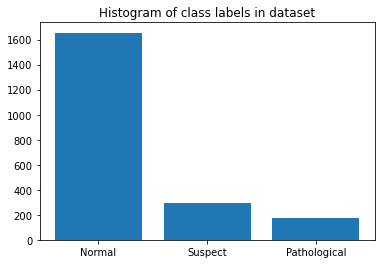

In [7]:
unq, counts = np.unique(y, return_counts=True)
plt.bar(["Normal", "Suspect", "Pathological"], counts)
# plt.xticks(range(0, 3))
plt.title("Histogram of class labels in dataset")
plt.show()
